# Gemma-3-4b-it Evaluation

## 0. Setup

In [1]:
import os
os.environ['HF_HOME'] = 'D:/HF/cache'
os.environ['HF_DATASETS'] = 'D:/HF/datasets'
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = "1"

In [2]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["FSDP_CPU_RAM_EFFICIENT_LOADING"] = "false"

In [ ]:
# !pip install -q transformers==4.51.1

In [3]:
from IPython.display import display
from tqdm.notebook import tqdm as notebook_tqdm

In [ ]:
"""
from huggingface_hub import notebook_login
notebook_login()
"""

In [ ]:
"""
from huggingface_hub import login
from dotenv import load_dotenv
from pathlib import Path
import os

dotenv_path = Path('Z:/Misc/access_token.env.txt')
load_dotenv(dotenv_path=dotenv_path)
access_key=os.getenv('HF_TOKEN')

print(f"HF Access Key: {access_key}")
"""

In [4]:
!nvidia-smi

Fri Aug  1 14:02:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 553.62                 Driver Version: 553.62         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A10-24Q               WDDM  |   00000002:00:00.0 Off |                    0 |
| N/A    0C    P8             N/A /  N/A  |    1450MiB /  24512MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1. Running Gemma-3-4b-it Model on a single GPU

In [5]:
from transformers import AutoProcessor, Gemma3ForConditionalGeneration
from PIL import Image
import requests
import torch

model_id = "//swschoolavdazfiles002.file.core.windows.net/aias-language/Model/gemma-3-4b-it"

model = Gemma3ForConditionalGeneration.from_pretrained(
    model_id,
    device_map="auto",
).eval()

processor = AutoProcessor.from_pretrained(model_id, use_fast=False)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
image_file = "https://huggingface.co/spaces/big-vision/paligemma-hf/resolve/main/examples/password.jpg"
raw_image = Image.open(requests.get(image_file, stream=True).raw)

In [7]:
messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": "You are a helpful assistant."}]
    },
    {
        "role": "user",
        "content": [
            {"type": "image", "url": image_file},
            {"type": "text", "text": "What is the password?"}
        ]
    }
]

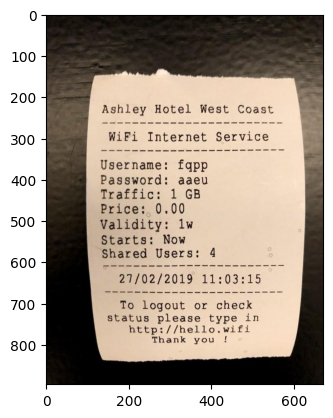

In [8]:
import matplotlib.pyplot as plt
plt.imshow(raw_image)
plt.show()

In [9]:
inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt"
).to(model.device)

input_len = inputs["input_ids"].shape[-1]

In [10]:
with torch.inference_mode():
    generation = model.generate(**inputs, max_new_tokens=100, do_sample=True)
    generation = generation[0][input_len:]

decoded = processor.decode(generation, skip_special_tokens=True)
print(decoded)

The password is **aaeu**.<end_of_turn>
